<a href="https://colab.research.google.com/github/Templar137/AI_project/blob/main/%EC%99%B8%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 (한길테크)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate, BatchNormalization, LayerNormalization, Add
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import random
import xgboost

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Industry/한길테크/20211207.csv')

In [ ]:
df = df[['Sec', 'Ch1', 'Ch2', 'Ch3']]

In [ ]:
df

,Sec,Ch1,Ch2,Ch3
0,0.0,24.9,24.9,26.1
1,0.3,24.9,25.5,26.1
2,0.6,24.9,24.9,26.1
3,0.9,25.5,24.9,25.5
4,1.2,25.5,24.9,25.5
...,...,...,...,...
930,279.0,137.5,144.3,62.5
931,279.3,137.5,143.7,62.5
932,279.6,137.5,143.4,61.3
933,279.9,136.4,143.4,61.3


In [ ]:
cluster = KMeans(init="k-means++", n_clusters=2, n_init=15)
cluster.fit(df)

KMeans(n_clusters=2, n_init=15)

In [ ]:
labels = cluster.labels_
k_means_cluster_centers = cluster.cluster_centers_

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
df.iloc[my_members, 0]

299     89.7
300     90.0
301     90.3
302     90.6
303     90.9
       ...  
930    279.0
931    279.3
932    279.6
933    279.9
934    280.2
Name: Sec, Length: 636, dtype: float64

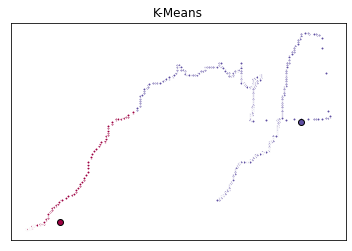

In [ ]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(6, 4))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(2), colors):
    my_members = (labels == k)

    # 중심 정의
    cluster_center = k_means_cluster_centers[k]

    # 중심 그리기
    ax.plot(df.iloc[my_members, 1], df.iloc[my_members, 3], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [ ]:
df['label'] = labels
x_train = df.drop(columns = 'label')
y_train = df['label']

In [ ]:
models_xgb = []
count = 0
n_fold = 5
total_nmae = 0

skt = StratifiedKFold(n_splits=n_fold, shuffle = True, random_state = 137)
folds=[]
for train_idx, valid_idx in skt.split(x_train, y_train):
    folds.append((train_idx, valid_idx))

count = 0
for i in range(n_fold):
    count += 1
    
    train_idx, valid_idx = folds[i]
    train_x = x_train.iloc[train_idx,:]
    train_y = y_train[train_idx]

    val_x = x_train.iloc[valid_idx,:]
    val_y = y_train[valid_idx]
    print(f'XGB {count}th fold')

    xgb = xgboost.XGBClassifier()
    xgb.fit(train_x, train_y,
            eval_set = [(val_x, val_y)],
            eval_metric = 'logloss',
            early_stopping_rounds = 500,
            verbose = 10
            )
    prediction = xgb.predict(val_x)

    print("\n정확도:", accuracy_score(prediction, val_y))
    print("정밀도:", precision_score(prediction, val_y, average = 'macro'))
    print("재현율:", recall_score(prediction, val_y, average = 'macro'))
    print("F1:",f1_score(prediction, val_y, average = 'macro'))

    print(confusion_matrix(prediction, val_y))

    models_xgb.append(xgb)

XGB 1th fold
[0]	validation_0-logloss:0.599091
Will train until validation_0-logloss hasn't improved in 500 rounds.
[10]	validation_0-logloss:0.179705
[20]	validation_0-logloss:0.063892
[30]	validation_0-logloss:0.024575
[40]	validation_0-logloss:0.010355
[50]	validation_0-logloss:0.004963
[60]	validation_0-logloss:0.002808
[70]	validation_0-logloss:0.002574
[80]	validation_0-logloss:0.002564
[90]	validation_0-logloss:0.002561
[99]	validation_0-logloss:0.002561

정확도: 1.0
정밀도: 1.0
재현율: 1.0
F1: 1.0
[[ 60   0]
 [  0 127]]
XGB 2th fold
[0]	validation_0-logloss:0.599091
Will train until validation_0-logloss hasn't improved in 500 rounds.
[10]	validation_0-logloss:0.179705
[20]	validation_0-logloss:0.063892
[30]	validation_0-logloss:0.024575
[40]	validation_0-logloss:0.010355
[50]	validation_0-logloss:0.004963
[60]	validation_0-logloss:0.002806
[70]	validation_0-logloss:0.002585
[80]	validation_0-logloss:0.002575
[90]	validation_0-logloss:0.002572
[99]	validation_0-logloss:0.002571

정확도: 1.0

5번의 Test 결과, 고장 진단에 상당히 높은 정확도를 보여주고 있음

# Task 2 (동연스틸)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate, BatchNormalization, LayerNormalization, Add
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import random
import xgboost

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Industry/동연스틸/동연스틸 교정1호기 공정측정데이타.csv')

In [ ]:
df

,area_id,lot_no,od_item_seq,is_prc_chk,lot_dt,c_tag,lot_tag,etc,c_user_id,p01,...,p05,p06,chk_datetime,p01.1,p02.1,p03.1,p04.1,p05.1,p06.1,ok_ng
0,사업장,LOT NO,수주세부번호,작업지시여부,로트생성일,작업취소여부,LOT채번구분,비고,작업취소자ID,탐침1기준,...,탐침5기준,탐침6기준,작업시간,탐침1,탐침2,탐침3,탐침4,탐침5,탐침6,"OK,NG"
1,A01,IK04017,20201104006002,Y,20201104,NaN,NaN,NaN,NaN,6,...,6,6,52:12.4,0.17,0.42,0.14,0.19,0.5,0.32,OK
2,A01,IK04017,20201104006002,Y,20201104,NaN,NaN,NaN,NaN,6,...,6,6,52:48.5,0.15,0.42,0.15,0.2,0.53,0.39,OK
3,A01,IK04017,20201104006002,Y,20201104,NaN,NaN,NaN,NaN,6,...,6,6,57:53.6,0.18,0.42,0.16,0.22,0.47,0.29,OK
4,A01,IK04017,20201104006002,Y,20201104,NaN,NaN,NaN,NaN,6,...,6,6,58:03.2,0.18,0.47,0.2,0.22,0.5,0.34,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,A01,JK04030,20211104006001,Y,20211104,NaN,NaN,NaN,NaN,6,...,6,6,09:16.9,0.4,0.01,0.24,0.11,2.12,0.34,OK
626,A01,JK24120,20211124002003,Y,20211124,NaN,NaN,NaN,NaN,6,...,6,6,39:17.2,0,0,0,0,0,2.17,OK
627,A01,JK24125,20211124003004,Y,20211124,NaN,NaN,NaN,NaN,6,...,6,6,38:08.0,0.38,0.48,0.23,0.2,0.47,0.69,OK
628,A01,JK24125,20211124003004,Y,20211124,NaN,NaN,NaN,NaN,6,...,6,6,55:59.4,0.06,0.2,0.52,0.27,0.17,0.35,OK


In [ ]:
df = df.iloc[1:,:]
df = df.reset_index()

In [ ]:
x_train = df[['chk_datetime', 'p01.1', 'p02.1', 'p03.1', 'p04.1', 'p05.1', 'p06.1']]
y_train = df['c_tag']

In [ ]:
x_train['chk_datetime'] = x_train['chk_datetime'].str[0:2].astype(int) * 3600 + x_train['chk_datetime'].str[3:5].astype(int) * 60 + x_train['chk_datetime'].str[6:8].astype(int)

In [ ]:
cluster = KMeans(init="k-means++", n_clusters=2, n_init=100)
cluster.fit(x_train)
y_train = cluster.labels_

In [ ]:
x_train = x_train.astype(float)

In [ ]:
models_xgb = []
count = 0
n_fold = 5
total_nmae = 0

skt = StratifiedKFold(n_splits=n_fold, shuffle = True, random_state = 137)
folds=[]
for train_idx, valid_idx in skt.split(x_train, y_train):
    folds.append((train_idx, valid_idx))

count = 0
for i in range(n_fold):
    count += 1
    
    train_idx, valid_idx = folds[i]
    train_x = x_train.iloc[train_idx,:]
    train_y = y_train[train_idx]

    val_x = x_train.iloc[valid_idx,:]
    val_y = y_train[valid_idx]
    print(f'XGB {count}th fold')

    xgb = xgboost.XGBClassifier()
    xgb.fit(train_x, train_y,
            eval_set = [(val_x, val_y)],
            eval_metric = 'logloss',
            early_stopping_rounds = 500,
            verbose = 10
            )
    prediction = xgb.predict(val_x)

    print("\n정확도:", accuracy_score(prediction, val_y))
    print("정밀도:", precision_score(prediction, val_y, average = 'macro'))
    print("재현율:", recall_score(prediction, val_y, average = 'macro'))
    print("F1:",f1_score(prediction, val_y, average = 'macro'))

    print(confusion_matrix(prediction, val_y))

    models_xgb.append(xgb)

XGB 1th fold
[0]	validation_0-logloss:0.599552
Will train until validation_0-logloss hasn't improved in 500 rounds.
[10]	validation_0-logloss:0.181118
[20]	validation_0-logloss:0.065234
[30]	validation_0-logloss:0.025776
[40]	validation_0-logloss:0.011385
[50]	validation_0-logloss:0.005798
[60]	validation_0-logloss:0.003947
[70]	validation_0-logloss:0.003946
[80]	validation_0-logloss:0.003945
[90]	validation_0-logloss:0.003945
[99]	validation_0-logloss:0.003945

정확도: 1.0
정밀도: 1.0
재현율: 1.0
F1: 1.0
[[68  0]
 [ 0 58]]
XGB 2th fold
[0]	validation_0-logloss:0.599552
Will train until validation_0-logloss hasn't improved in 500 rounds.
[10]	validation_0-logloss:0.181118
[20]	validation_0-logloss:0.065234
[30]	validation_0-logloss:0.025776
[40]	validation_0-logloss:0.011385
[50]	validation_0-logloss:0.005798
[60]	validation_0-logloss:0.003944
[70]	validation_0-logloss:0.003943
[80]	validation_0-logloss:0.003942
[90]	validation_0-logloss:0.003942
[99]	validation_0-logloss:0.003942

정확도: 1.0
정밀도

# Task3 (로보스타비에스디)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate, BatchNormalization, LayerNormalization, Add
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import random
import xgboost

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Dataset/Industry/로보스타비에스디/로보스타비에스디_노후공정 제조데이터 활용 공급기술 고도화 사업_시스템 사용데이터(화면).xlsx')

In [ ]:
df = df[['품명', '검사항목', '측정값', '기준값', '하한값', '상한값', '합/불']]

In [ ]:
# Le = LabelEncoder()
# Le.fit(df['품명'])
# label = Le.transform(df['품명'])
Ohe = OneHotEncoder(sparse=False)
Ohe.fit(df[['품명']])
df_name = pd.DataFrame(Ohe.transform(df[['품명']]))
df_name = df_name.set_axis(['name_' + str(i) for i in range(41)], axis='columns')
Ohe = OneHotEncoder(sparse=False)
Ohe.fit(df[['검사항목']])
df_check = pd.DataFrame(Ohe.transform(df[['검사항목']]))
df_check = df_check.set_axis(['check_' + str(i) for i in range(7)], axis='columns')

In [ ]:
df = pd.concat([df.drop(columns = ['품명', '검사항목']), df_name, df_check], axis=1)

In [ ]:
x_train = df.drop(columns = '합/불')
y_train = df['합/불']

In [ ]:
models_xgb = []
count = 0
n_fold = 5
total_nmae = 0

skt = StratifiedKFold(n_splits=n_fold, shuffle = True, random_state = 137)
folds=[]
for train_idx, valid_idx in skt.split(x_train, y_train):
    folds.append((train_idx, valid_idx))

count = 0
for i in range(n_fold):
    count += 1
    
    train_idx, valid_idx = folds[i]
    train_x = x_train.iloc[train_idx,:]
    train_y = y_train[train_idx]

    val_x = x_train.iloc[valid_idx,:]
    val_y = y_train[valid_idx]
    print(f'XGB {count}th fold')

    xgb = xgboost.XGBClassifier()
    xgb.fit(train_x, train_y,
            eval_set = [(val_x, val_y)],
            eval_metric = 'logloss',
            early_stopping_rounds = 500,
            verbose = 10
            )
    prediction = xgb.predict(val_x)

    print("\n정확도:", accuracy_score(prediction, val_y))
    print("정밀도:", precision_score(prediction, val_y, average = 'macro'))
    print("재현율:", recall_score(prediction, val_y, average = 'macro'))
    print("F1:",f1_score(prediction, val_y, average = 'macro'))

    print(confusion_matrix(prediction, val_y))

    models_xgb.append(xgb)

XGB 1th fold
[0]	validation_0-logloss:0.600726
Will train until validation_0-logloss hasn't improved in 500 rounds.
[10]	validation_0-logloss:0.193041
[20]	validation_0-logloss:0.085294
[30]	validation_0-logloss:0.052371


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


[40]	validation_0-logloss:0.039471
[50]	validation_0-logloss:0.036124
[60]	validation_0-logloss:0.037364
[70]	validation_0-logloss:0.03741
[80]	validation_0-logloss:0.037587
[90]	validation_0-logloss:0.037639
[99]	validation_0-logloss:0.037779

정확도: 0.9938650306748467
정밀도: 0.5
재현율: 0.49693251533742333
F1: 0.49846153846153846
[[  0   0]
 [  1 162]]
XGB 2th fold
[0]	validation_0-logloss:0.600726
Will train until validation_0-logloss hasn't improved in 500 rounds.
[10]	validation_0-logloss:0.191922
[20]	validation_0-logloss:0.083594
[30]	validation_0-logloss:0.049694


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[40]	validation_0-logloss:0.038253
[50]	validation_0-logloss:0.037104
[60]	validation_0-logloss:0.039248
[70]	validation_0-logloss:0.040013
[80]	validation_0-logloss:0.040001
[90]	validation_0-logloss:0.040035
[99]	validation_0-logloss:0.040184

정확도: 0.9938650306748467
정밀도: 0.5
재현율: 0.49693251533742333
F1: 0.49846153846153846
[[  0   0]
 [  1 162]]
XGB 3th fold
[0]	validation_0-logloss:0.600726
Will train until validation_0-logloss hasn't improved in 500 rounds.
[10]	validation_0-logloss:0.193041
[20]	validation_0-logloss:0.084623
[30]	validation_0-logloss:0.052525
[40]	validation_0-logloss:0.04433


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[50]	validation_0-logloss:0.043742
[60]	validation_0-logloss:0.044487
[70]	validation_0-logloss:0.045688
[80]	validation_0-logloss:0.047206
[90]	validation_0-logloss:0.048208
[99]	validation_0-logloss:0.048364

정확도: 0.9938650306748467
정밀도: 0.5
재현율: 0.49693251533742333
F1: 0.49846153846153846
[[  0   0]
 [  1 162]]
XGB 4th fold
[0]	validation_0-logloss:0.59979
Will train until validation_0-logloss hasn't improved in 500 rounds.
[10]	validation_0-logloss:0.183159
[20]	validation_0-logloss:0.068903
[30]	validation_0-logloss:0.029796


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[40]	validation_0-logloss:0.015881
[50]	validation_0-logloss:0.010819
[60]	validation_0-logloss:0.008714
[70]	validation_0-logloss:0.007489
[80]	validation_0-logloss:0.006781
[90]	validation_0-logloss:0.006437
[99]	validation_0-logloss:0.006247

정확도: 1.0
정밀도: 1.0
재현율: 1.0
F1: 1.0
[[162]]
XGB 5th fold
[0]	validation_0-logloss:0.600731
Will train until validation_0-logloss hasn't improved in 500 rounds.
[10]	validation_0-logloss:0.191942
[20]	validation_0-logloss:0.083464
[30]	validation_0-logloss:0.050944
[40]	validation_0-logloss:0.042089
[50]	validation_0-logloss:0.041691
[60]	validation_0-logloss:0.042825
[70]	validation_0-logloss:0.043049
[80]	validation_0-logloss:0.043957
[90]	validation_0-logloss:0.044092
[99]	validation_0-logloss:0.04428

정확도: 0.9938271604938271
정밀도: 0.5
재현율: 0.49691358024691357
F1: 0.4984520123839009
[[  0   0]
 [  1 161]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
